# DOWN SYNDROME IN MICE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("Assg_1\Data_Cortex_Nuclear.xls") ## The Original Data

In [5]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


## PREDICTING THE GENEOTYPE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

#### Obseravtions: Here all the data is not numeric (MouseID, Genotype , Treatment, Behavior, Class). Hence, we should use some dummy varaibles in this case. However, for this problem we have to use features from the columns starting from DYRK1A_N to CaNA_N to predict the Genotype. Hence we drop the colums of MouseID, Treatment, Behavior and Class. Hence, we get the data used for this classification problem.


In [7]:
cols_to_drop = ['MouseID', 'Treatment', 'Behavior', 'class']
df = df.drop(cols_to_drop , axis = 1)

In [8]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control


In [9]:
df.nunique()

DYRK1A_N     1077
ITSN1_N      1076
BDNF_N       1077
NR1_N        1077
NR2A_N       1077
             ... 
H3AcK18_N     900
EGR1_N        870
H3MeK4_N      810
CaNA_N       1080
Genotype        2
Length: 78, dtype: int64

#### Observation: As the target variable takes only two values, we have a binary classification problem. 
#### Next: We convert the Genotype values to a numeric variable

In [10]:
## Converting categorical data to numeric values
df['Gene'] = pd.factorize(df['Genotype'])[0]

In [11]:
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Gene
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,1
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,1
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,1
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,1


In [12]:
## Storing the transformation in dictionary
Gene_dict = {'0': 'Control' , '1' : 'Ts65Dn'}

## droping the categorical variable
df = df.drop('Genotype', axis = 1)

In [13]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Gene
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0


#### Now, all our data is numeric and we can continue further with data pre processing

### Filling missing values

In [14]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

DYRK1A_N
ITSN1_N
BDNF_N
NR1_N
NR2A_N
pAKT_N
pBRAF_N
pCAMKII_N
pCREB_N
pELK_N
pERK_N
pJNK_N
PKCA_N
pMEK_N
pNR1_N
pNR2A_N
pNR2B_N
pPKCAB_N
pRSK_N
AKT_N
BRAF_N
CAMKII_N
CREB_N
ELK_N
ERK_N
GSK3B_N
JNK_N
MEK_N
TRKA_N
RSK_N
APP_N
Bcatenin_N
SOD1_N
MTOR_N
P38_N
pMTOR_N
DSCR1_N
AMPKA_N
NR2B_N
pNUMB_N
RAPTOR_N
TIAM1_N
pP70S6_N
BAD_N
BCL2_N
pCFOS_N
H3AcK18_N
EGR1_N
H3MeK4_N


#### All these columns have missing values. We fill them with the median of the column.

In [15]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())

#### Now, let's see if our data has any missing values

In [16]:
df.isna().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Gene         0
Length: 78, dtype: int64

#### Obseravtions: Good! Now, the data is in the required format and we can proceed with further pre-processign of the data and it's visualisation

#### For this problem, Gene is the target variable and rest variables are the features. For moving further, we split the given data into train and test datasets.

## Train-Test Splitting

In [17]:
## Separating the features and the target variables
X = df.drop('Gene', axis =1)
y = df['Gene']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2) # We keep 20 percent of the data for testing

## Data Pre-Processing and Visulisation

In [19]:
for col in X_train.columns.values:
    list_vals = pd.unique(X_train[col])
    print("This feature", col,"is of the type", str(X_train[col].dtypes),"and has", str(len(list_vals)), "unique values and", str(np.isnan(list_vals).sum()), "null values")


This feature DYRK1A_N is of the type float64 and has 862 unique values and 0 null values
This feature ITSN1_N is of the type float64 and has 862 unique values and 0 null values
This feature BDNF_N is of the type float64 and has 862 unique values and 0 null values
This feature NR1_N is of the type float64 and has 862 unique values and 0 null values
This feature NR2A_N is of the type float64 and has 862 unique values and 0 null values
This feature pAKT_N is of the type float64 and has 861 unique values and 0 null values
This feature pBRAF_N is of the type float64 and has 860 unique values and 0 null values
This feature pCAMKII_N is of the type float64 and has 862 unique values and 0 null values
This feature pCREB_N is of the type float64 and has 862 unique values and 0 null values
This feature pELK_N is of the type float64 and has 862 unique values and 0 null values
This feature pERK_N is of the type float64 and has 863 unique values and 0 null values
This feature pJNK_N is of the type f

#### As none of the feature have null values in them, we do not need any further pre-processing
#### Next: We look at features which have low diversity

In [20]:
## Check if any feature has low diversity
for col in X_train.columns.values:
    list_vals = pd.unique(X_train[col])
    if (len(list_vals)<10): # If the feature has less than 10 unique values, then print them
        print(col)


#### Observations: 
#### 1) None of the columns have null entries
#### 2) All the features except quality have high diversity.
#### Next: Plot the features to visualize the problem. 

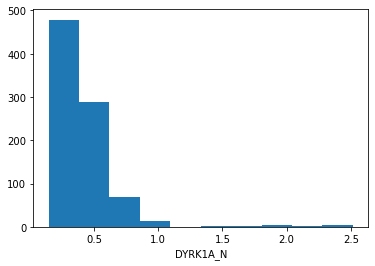

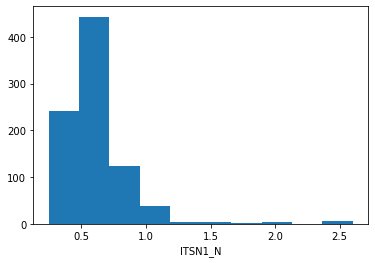

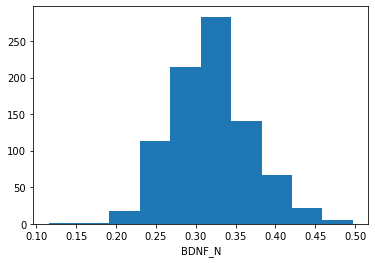

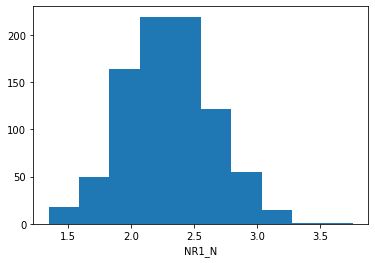

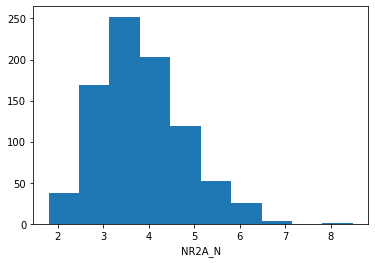

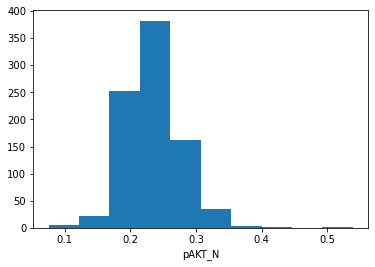

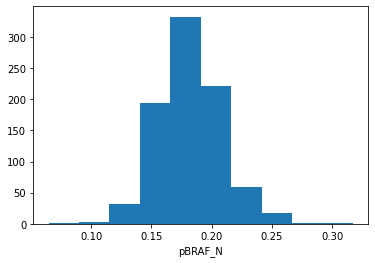

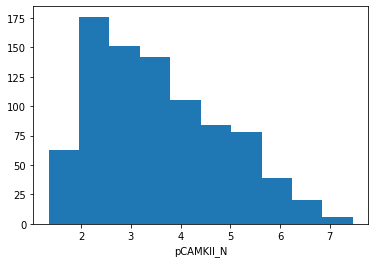

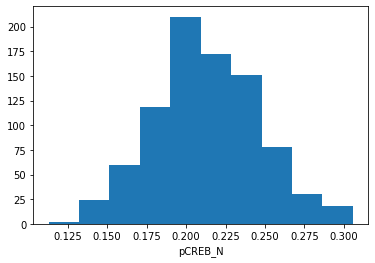

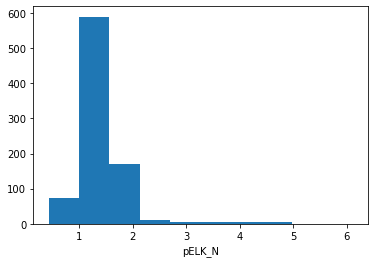

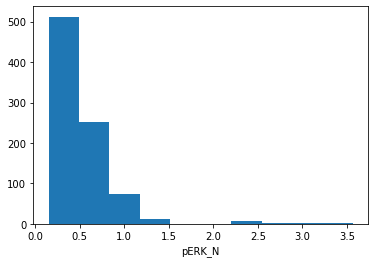

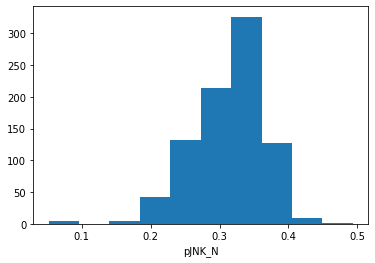

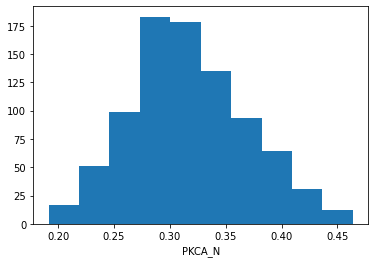

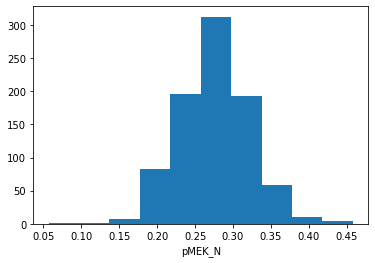

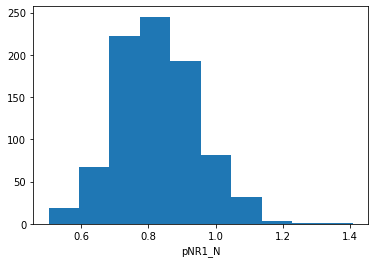

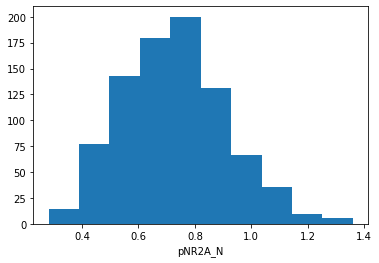

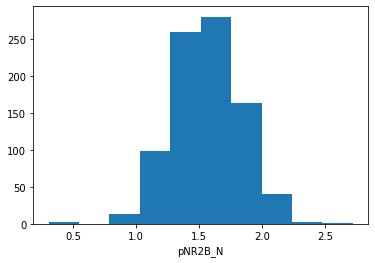

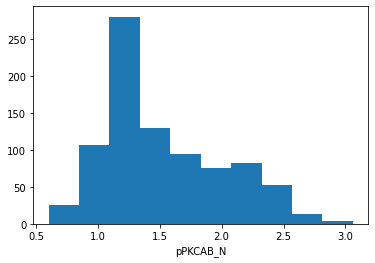

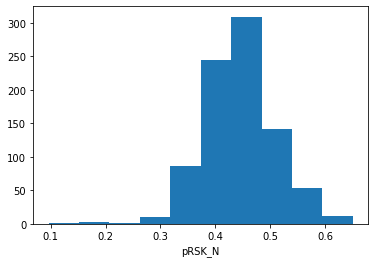

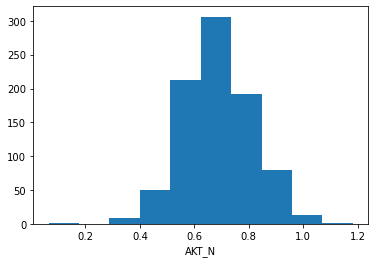

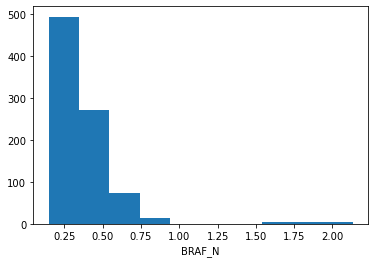

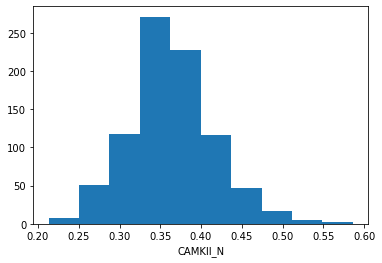

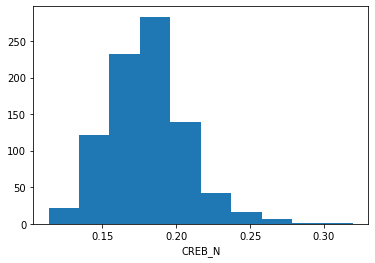

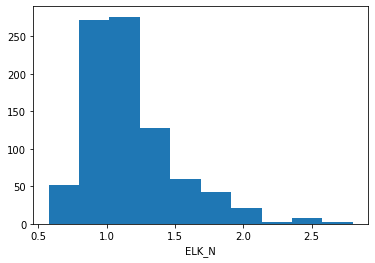

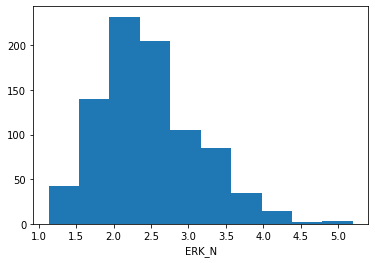

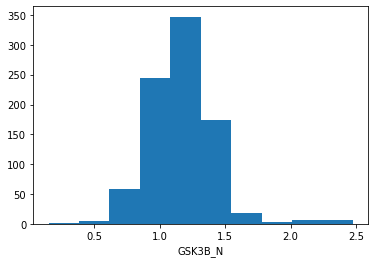

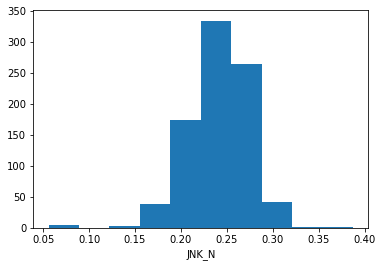

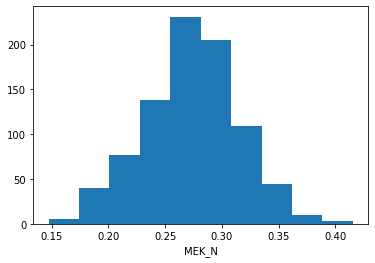

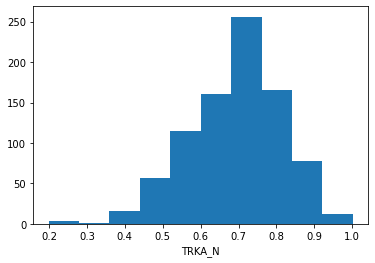

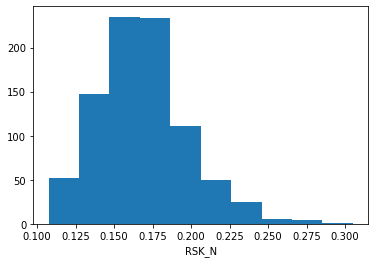

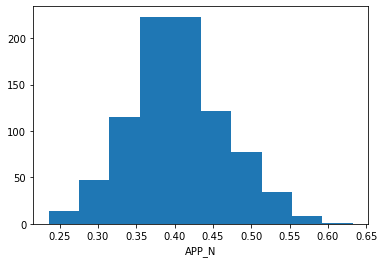

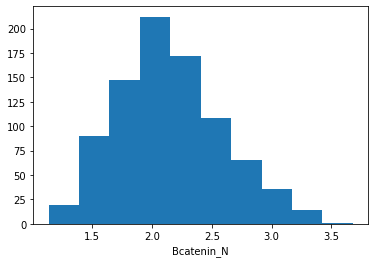

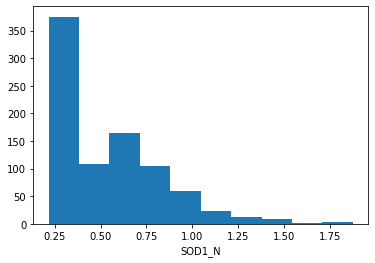

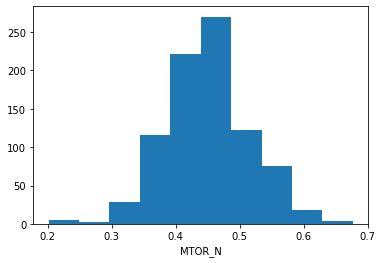

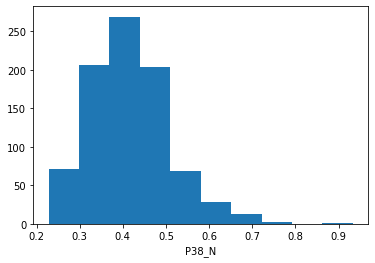

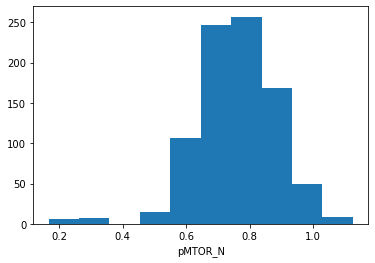

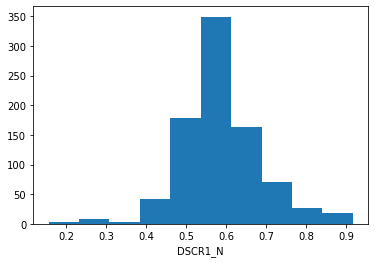

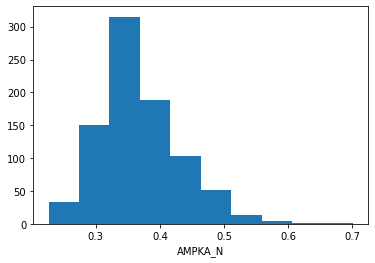

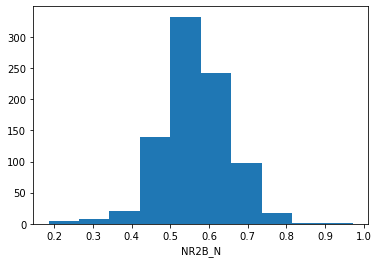

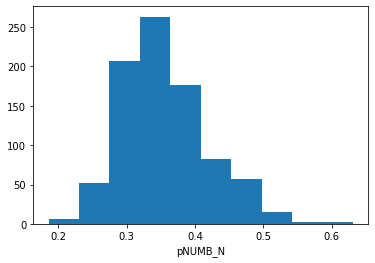

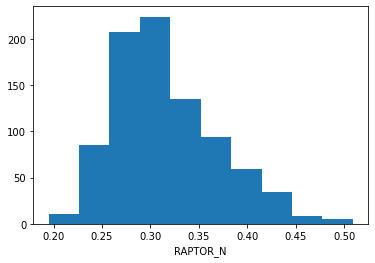

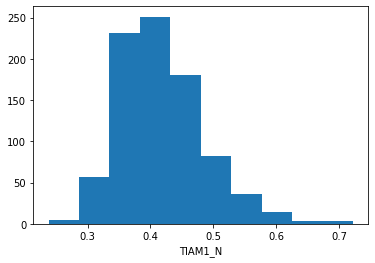

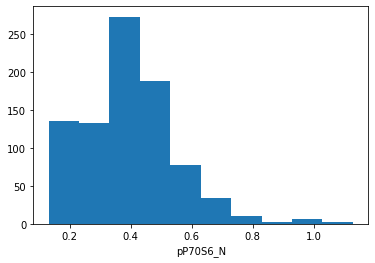

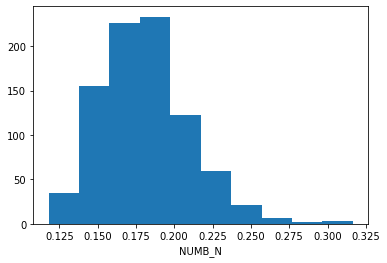

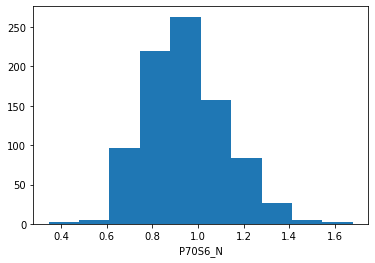

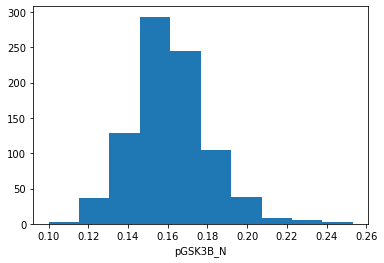

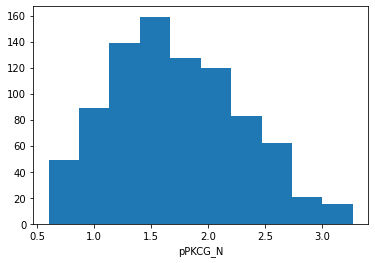

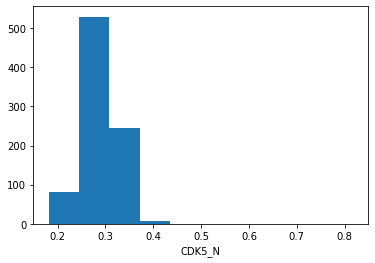

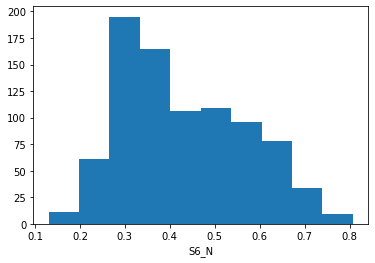

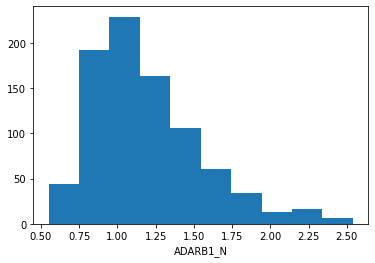

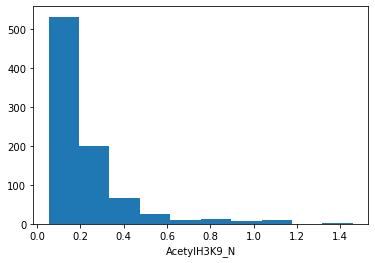

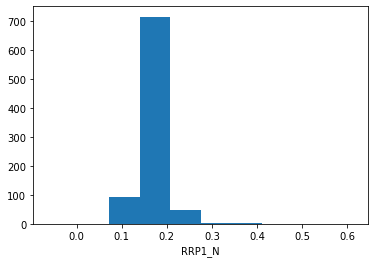

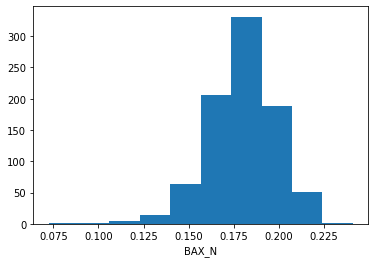

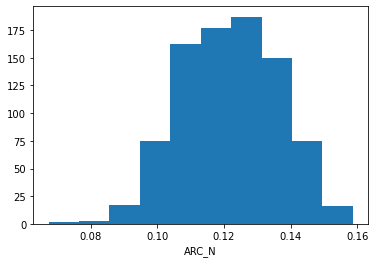

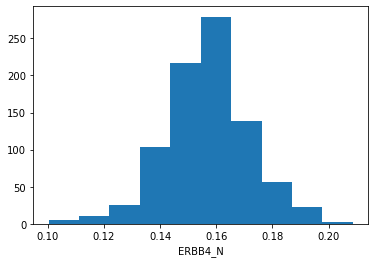

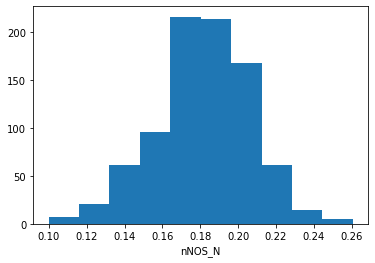

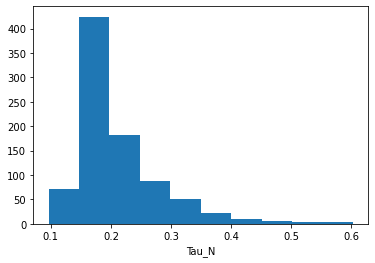

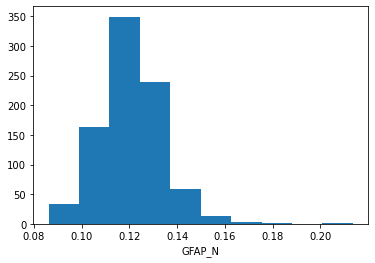

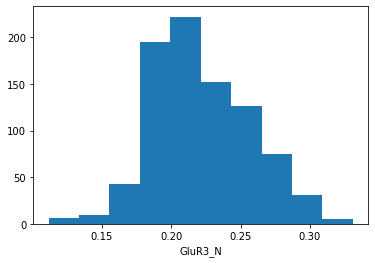

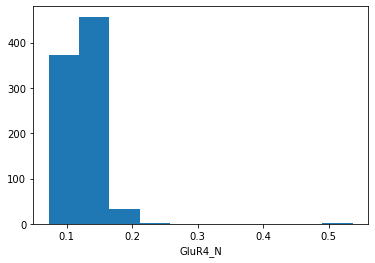

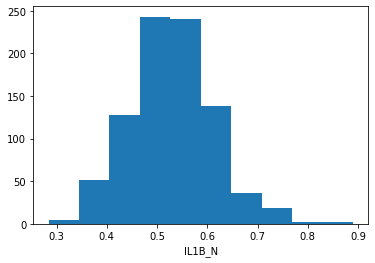

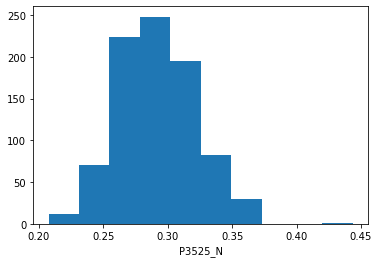

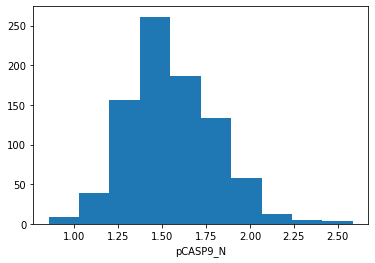

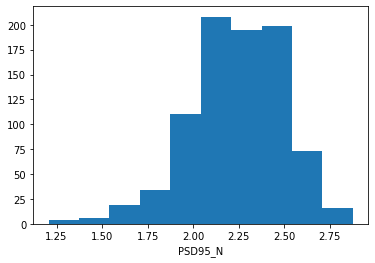

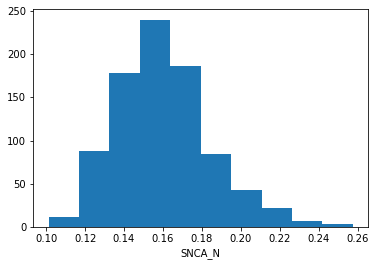

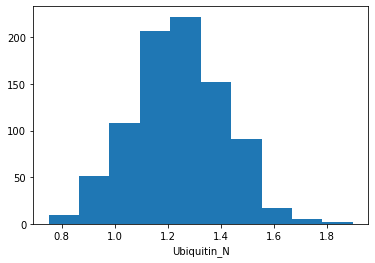

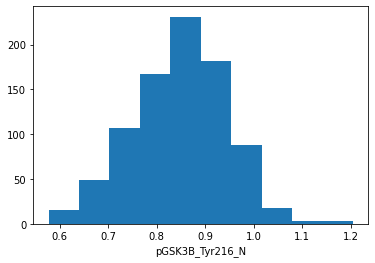

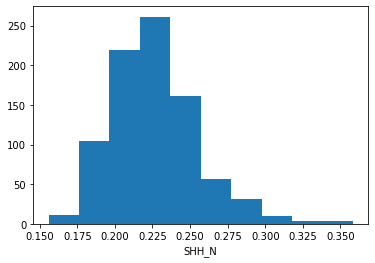

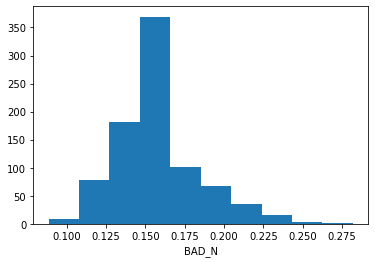

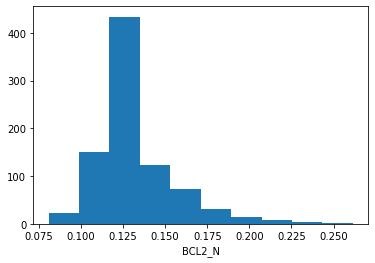

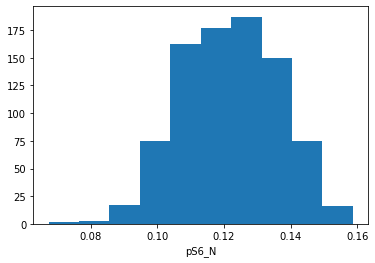

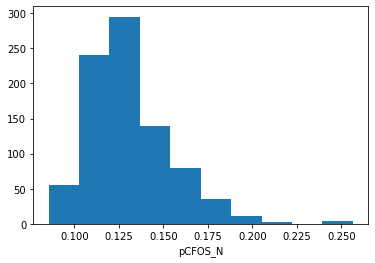

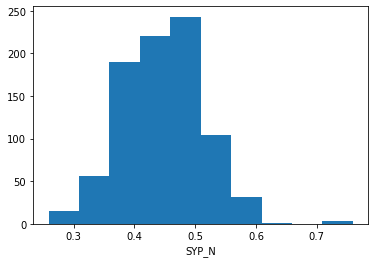

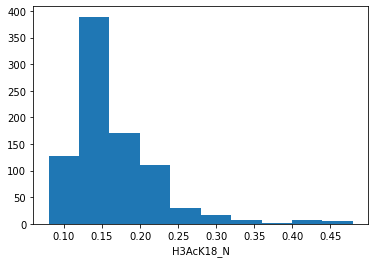

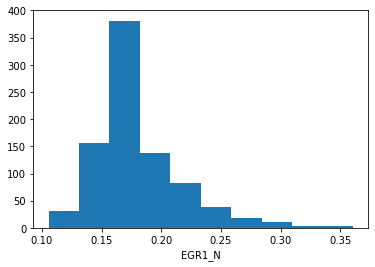

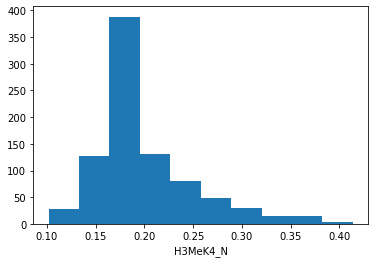

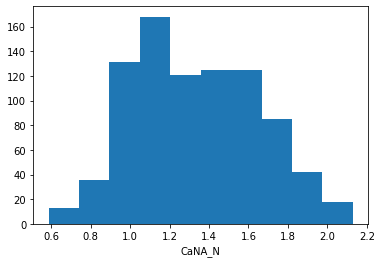

In [21]:
# Plot the histogram of the features.

for col in X_train.columns.values:
    plt.hist(X_train[col])
    plt.xlabel(col)
    plt.show()

#### Observation: All the variables are spread well
#### Next: We have a look at the corrtelation matrix

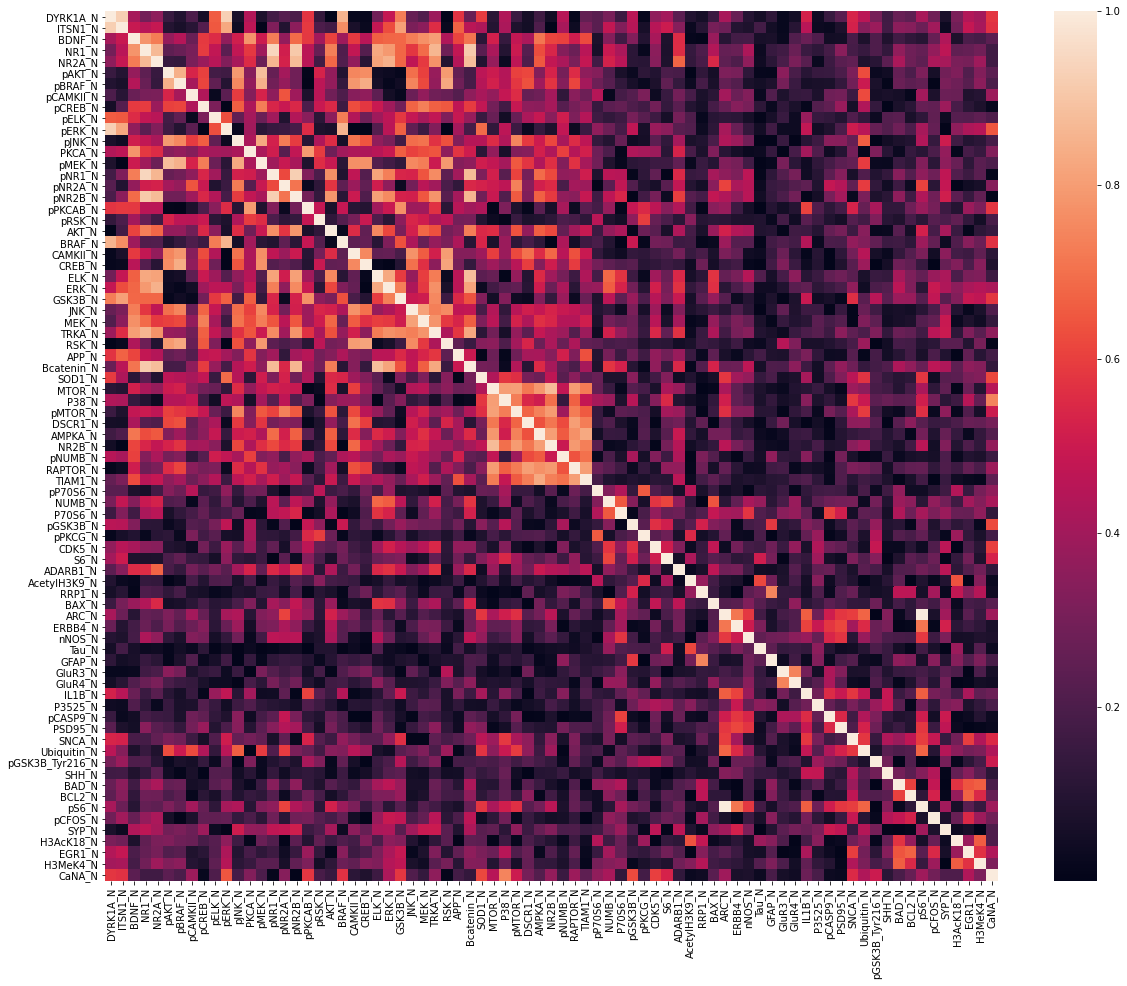

In [35]:
corrMatrix =X_train.corr(method = "spearman")
fig , ax = plt.subplots(figsize = (20,16))
sns.heatmap(abs(corrMatrix) , annot= False) # Show absolute value
plt.show()

#### There isn't much correlation in the features as can be seen above in the correlation matrix. Hence, we continue with all the features

## Prepare data

In [23]:
# Normalize data

from sklearn import preprocessing
scaler = preprocessing.StandardScaler() # For data normalization

scaler.fit(X_train)    #Compute mean and std
train_X = pd.DataFrame(scaler.transform(X_train)) # Use mean and deviation
train_Y = pd.DataFrame(y_train)
display("train_X")
print(train_X.mean)

'train_X'

<bound method DataFrame.mean of            0         1         2         3         4         5         6   \
0    1.224459  1.098727 -1.092534 -0.631471 -0.881794 -1.506969 -1.332410   
1   -0.361581 -0.230234 -0.626195  0.078458 -0.787895  1.241488  0.788466   
2    0.739321  0.559350  0.651671 -0.510129 -1.237236  0.977275  1.529117   
3   -0.240711 -0.129064 -0.651343 -1.168994 -0.759819 -0.126409 -0.528562   
4   -0.254616 -0.150582  0.169332 -0.598897 -0.754057  1.972602  1.584185   
..        ...       ...       ...       ...       ...       ...       ...   
859 -0.624691 -1.004208 -0.117961 -1.125491 -0.652053 -0.110467 -0.722576   
860 -0.386146 -0.206885  0.962578  2.037965  1.650914  0.785554  0.983900   
861 -0.458303 -0.489069 -0.600189  0.560222  0.527484 -0.166199 -0.627222   
862 -0.131746 -0.124512 -0.683702 -0.988408 -0.442842 -0.332217 -0.510934   
863 -0.248569  0.088388  0.729294  1.142082  0.605913 -0.547846 -0.380464   

           7         8         9   ...     

In [24]:
test_X = pd.DataFrame(scaler.transform(X_test))
test_y = pd.DataFrame(y_test)
display(test_X)
print(test_X.mean())
print(test_y)


,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.061187,-0.315963,-0.035497,-0.388693,-0.125019,-4.051682,-4.343021,-0.823540,-0.982046,-0.302425,...,0.060530,-0.164326,-0.162957,-0.560956,-0.597264,-0.409904,-0.511786,-0.177055,-0.411252,0.284478
1,-0.135559,0.158366,1.853975,1.476738,1.227935,-2.485332,-1.578676,-0.488095,-0.028128,-0.544153,...,-0.223677,-1.127610,-0.568729,0.205933,0.086242,1.054916,-1.052296,-0.867354,-1.542668,1.453508
2,-0.330356,-0.289288,-0.570317,-0.151119,-0.514156,0.960833,0.713866,0.752203,0.528490,-0.125309,...,-0.092705,-0.265429,0.539511,1.162725,-0.080047,-0.752171,-0.179135,-0.115537,-0.197859,-0.392771
3,1.076495,0.707806,0.633900,0.480514,1.833263,-0.675528,-0.625042,-1.120400,-1.268215,1.034979,...,-1.810522,-0.962109,-0.015250,-0.679253,-0.178845,0.122345,-1.023608,-0.657609,-0.914837,0.230213
4,-0.529784,-0.318405,0.788342,1.593364,0.762683,0.076519,0.427513,-0.235800,1.563143,0.445782,...,-0.999198,-1.448977,-1.776529,0.116548,-1.354041,0.355178,-1.287146,-0.790966,-1.035755,-0.601614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-0.226033,-0.243904,1.364761,0.497867,0.546237,2.852065,1.867679,1.980275,0.895188,0.505355,...,0.269853,2.145741,1.702763,-0.479713,-0.025703,0.628464,0.472684,1.083275,0.783462,-0.781719
212,-0.473092,-0.020825,0.057829,0.373654,0.265672,1.996946,1.037184,0.681348,0.364678,-0.178664,...,2.252952,-0.371544,0.586406,1.313715,1.261764,-0.353813,0.818394,0.525925,0.894705,-0.596473
213,-0.399368,-0.581282,0.117362,0.142561,-0.661150,1.553498,1.868133,0.778410,0.753848,0.039946,...,2.490445,-0.164326,-0.162957,0.871429,1.496469,0.975960,-0.179135,3.478721,2.446178,-0.854046
214,0.500631,0.502041,-0.944968,-0.442923,-0.177765,-1.203868,-1.349357,-1.319960,-1.410193,0.311525,...,-1.070983,-1.159212,-1.215902,-0.544428,0.128749,-1.317364,-1.059844,-0.269798,-0.734208,0.395653


0     0.018411
1     0.002119
2     0.034181
3    -0.030592
4     0.033555
        ...   
72   -0.025827
73   -0.047282
74    0.037197
75   -0.121190
76    0.092711
Length: 77, dtype: float64
      Gene
338      0
346      0
805      1
17       0
512      0
...    ...
1049     1
759      1
162      0
907      1
736      1

[216 rows x 1 columns]


## Rigorous training and validation

### 1) Lasso Logistic Regression

#### In the following Lasso regression model, we use Cross-validation for hyperparameter tuning of the parameter alpha. 
#### Interpretation of the hyperparameter: 
#### 1) C : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
#### 2) solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
#### Algorithm to use in the optimization problem.

#### For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

#### For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

#### ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

#### ‘liblinear’ and ‘saga’ also handle L1 penalty

#### ‘saga’ also supports ‘elasticnet’ penalty
#### We use GridSearchCV for cross validating. 

In [27]:
from sklearn.model_selection import GridSearchCV

scoring = 'f1'

from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
hyperparameters = {'C':[0.1 , 1 , 10,100], 'solver':['newton-cg','lbfgs', 'liblinear','sag','saga']}
log = LogisticRegression(penalty='l1')
clf = GridSearchCV(log, param_grid = hyperparameters , scoring= scoring)
clf.fit(train_X, train_Y)
print('Best parameters: '+str(clf.best_params_))
print("Best score for "+ scoring+": " +str(clf.best_score_))


Best parameters: {'C': 1, 'solver': 'saga'}
Best score for f1: 0.9683484035857546


In [52]:
print("Test Classification Report: ")
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

y_true, y_pred = np.squeeze(y_test) , clf.predict(np.array(test_X))
print(classification_report(y_true , y_pred))

print("The ROC-AUC "+str((roc_auc_score(y_true, y_pred))))

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       117
           1       0.97      0.96      0.96        99

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216

The ROC-AUC 0.966977466977467


### SVR (Support Vector Regression)
#### SVR is a powerful algorithm that allows us to choose how tolerant we are of errors, both through an acceptable error margin(ϵ) and through tuning our tolerance of falling outside that acceptable error rate. SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.
#### The objective function of SVR is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The hyperparametersthat are tuned in SVR in the following model are:
#### 1) Kernel : The function used to map a lower dimensional data into a higher dimensional data. There are various types of kernels like radial basis function (rbf), linear, gaussian, etc.
##### 2) C: The Penalty Parameter. It tells the algorithm how much you care about misclassified points.
#### 3) Degree: It is the degree of the polynomial kernel function ('poly') and is ignored by all other kernels. The default value is 3. 

#### We use GridSearchCV for cross validating. 
#### The scoring function used here is "R squared"
#### R-squared: R Squared is a measurement that tells you to what extent the proportion of variance in the dependent variable is explained by the variance in the independent variables. In simpler terms, while the coefficients estimate trends, R-squared represents the scatter around the line of best fit. For example, if the R² is 0.80, then 80% of the variation can be explained by the model’s inputs. If the R² is 1.0 or 100%, that means that all movements of the dependent variable can be entirely explained by the movements of the independent variables. 

In [54]:
## First we will use an automated grid-search over renge of hyperparameters.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("Training SVC using GridSearchCV")
scoring = 'f1'

from sklearn import svm
hyperparameters = {'kernel':('rbf' , 'linear' , 'poly') , 'C':[0.1 , 1 , 10,100], 'degree':[3,5,8]}

svc = svm.SVC()
clf_svr = GridSearchCV(estimator=svc, param_grid = hyperparameters , scoring= scoring)
clf_svr.fit(np.array(train_X) , np.squeeze(train_Y))
print('Best parameters: '+str(clf_svr.best_params_))
print("Best "+ scoring+": " +str(clf_svr.best_score_))


print("Test Classification Report: ")
y_true, y_pred = np.squeeze(y_test) , clf_svr.predict(np.array(test_X))
print(classification_report(y_true , y_pred))

print("The ROC-AUC "+str((roc_auc_score(y_true, y_pred))))

Training SVC using GridSearchCV
Best parameters: {'C': 10, 'degree': 3, 'kernel': 'rbf'}
Best f1: 0.996378240233662
Test Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       117
           1       0.99      1.00      0.99        99

    accuracy                           1.00       216
   macro avg       0.99      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

The ROC-AUC 0.9957264957264957


## Random Forest Classification

#### Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.
#### The hyperparameters that are tuned in the following model are:
#### 1) max_depth : The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node: Using the max_depth parameter, I can limit up to what depth I want every tree in my random forest to grow
#### 2) n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

#### We use GridSearchCV for cross validating. 
#### The scoring function used here is "R squared"
#### R-squared: R Squared is a measurement that tells you to what extent the proportion of variance in the dependent variable is explained by the variance in the independent variables. In simpler terms, while the coefficients estimate trends, R-squared represents the scatter around the line of best fit. For example, if the R² is 0.80, then 80% of the variation can be explained by the model’s inputs. If the R² is 1.0 or 100%, that means that all movements of the dependent variable can be entirely explained by the movements of the independent variables. 

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("Training Random Forest Classifier using GridSearchCV")
scoring = 'f1'

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[2,5,10,20,40,100] , 'n_estimators':[10,30,80,100,130,170,200]}
clf_rfc = GridSearchCV(estimator=rfr, param_grid = hyperparameters , scoring= scoring)
clf_rfc.fit(np.array(train_X) , np.squeeze(train_Y))
print('Best parameters: '+str(clf_rfc.best_params_))
print("Best "+ scoring+": " +str(clf_rfc.best_score_))


print("Test Classification Report: ")
y_true, y_pred = np.squeeze(y_test) , clf_rfc.predict(np.array(test_X))
print(classification_report(y_true , y_pred))

print("The ROC-AUC "+str((roc_auc_score(y_true, y_pred))))

Training Random Forest Classifier using GridSearchCV
Best parameters: {'max_depth': 20, 'n_estimators': 100}
Best f1: 0.9889566857495431
Test Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        99

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

The ROC-AUC 1.0


## Recursive feature elimination and Cross Validation

#### Now, we try Lasso regresssion with the features which are important. We determine these important features using RFECV.

In [41]:
from sklearn.feature_selection import RFECV

clf_lr = LogisticRegression()
rfecv = RFECV(estimator = clf_lr , step = 1 , cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(train_X , train_Y)
print("Optimal number of features : ", rfecv.n_features_)
print("Best features : ",train_X.columns[rfecv.support_])

Optimal number of features :  38
Best features :  Int64Index([ 1,  3,  5,  8, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27,
            28, 29, 30, 32, 33, 37, 39, 41, 43, 51, 54, 56, 58, 60, 61, 65, 67,
            69, 70, 72, 76],
           dtype='int64')


In [56]:
print(rfecv.grid_scores_)

[0.70838822 0.7674553  0.80211722 0.86920957 0.88769996 0.89928754
 0.89813819 0.91436349 0.91666891 0.92591746 0.92824304 0.92477484
 0.9270937  0.93521307 0.9444549  0.94907918 0.94907246 0.95139132
 0.94907246 0.9537169  0.95602904 0.95487297 0.96527759 0.96063987
 0.96527759 0.95949052 0.96296545 0.95601559 0.95831429 0.96179594
 0.96180266 0.96179594 0.96294529 0.96525743 0.96410808 0.96526415
 0.96527087 0.97105122 0.96989515 0.96989515 0.96757629 0.96757629
 0.96642022 0.96642022 0.96642022 0.96409464 0.9664135  0.9664135
 0.96642022 0.96294529 0.96294529 0.96410136 0.96410136 0.9641148
 0.96295873 0.9641148  0.96295201 0.96295201 0.96295201 0.96295201
 0.96178922 0.96178922 0.96178922 0.96178922 0.96178922 0.96178922
 0.96294529 0.96294529 0.96294529 0.96294529 0.96178922 0.96178922
 0.96294529 0.96294529 0.96294529 0.96294529 0.96178922]


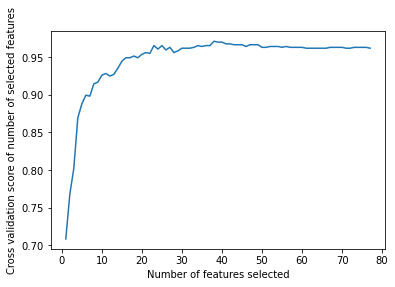

In [57]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [58]:
#### Now, let us look at the performance of our model with these features
train_X_rfecv = rfecv.transform(train_X)
test_X_rfecv = rfecv.transform(test_X)

In [59]:
clf_lr_rfecv = clf_lr.fit(train_X_rfecv,train_Y)

In [60]:
print("Test Classification Report: ")
y_true, y_pred = np.squeeze(test_y) , clf_lr_rfecv.predict(np.array(test_X_rfecv))
print(classification_report(y_true , y_pred))

print("The ROC-AUC "+str((roc_auc_score(y_true, y_pred))))

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       117
           1       0.97      0.96      0.96        99

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216

The ROC-AUC 0.966977466977467


#### Observation : Here, we did not observe any improvement in the results compared to the original model with all the features.